# SPH6004_assignment1_TXT

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from genetic_selection import GeneticSelectionCV
from sklearn.model_selection import train_test_split

## 1. Load Data and Brief  Analysis

In [2]:
df = pd.read_csv('./Assignment_1_data.csv')
df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,F,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,NaN,697.0,NaN,0.0,0.0,1.0,4.0,1.0,10,False
36485,F,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,2000.0,NaN,0.0,NaN,1.0,1.0,0.0,0,False
36486,F,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,3500.0,NaN,0.0,NaN,1.0,0.0,0.0,3,False
36487,M,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,1900.0,NaN,0.0,NaN,0.0,1.0,0.0,5,False


To convert a csv file into a dataframe for processing with pandas, we first need to figure out the amount of missing values in each columns,and consider how to handle the missing values in the table underlying the missing distribution.

In [3]:
#df.info()

In [4]:
df.describe()

,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,sbp_mean,...,bilirubin_indirect_max,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
count,36489.000000,36417.000000,36417.000000,36417.000000,36401.000000,36401.000000,36401.000000,36343.000000,36343.000000,36343.000000,...,1544.000000,1544.000000,35073.000000,7587.000000,36235.000000,18590.000000,36402.000000,36468.000000,36467.000000,36489.000000
mean,65.907162,70.935003,103.109572,84.855578,60.429777,105.484634,79.255689,94.449898,147.691412,119.757827,...,1.855894,1.742163,1914.991284,1.723738,0.481109,0.514094,1.060381,0.915433,0.826501,5.798104
std,16.797498,15.064109,20.682937,15.977454,13.347348,23.346984,11.758700,16.705217,22.855348,17.220898,...,2.293747,2.219434,1266.887914,0.588464,0.825034,0.963752,0.972511,1.050761,1.201510,3.014789
min,18.002527,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,40.000000,...,0.100000,0.100000,-14850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.549252,60.000000,88.000000,73.321429,53.000000,91.000000,70.896552,83.500000,132.000000,107.096464,...,0.500000,0.500000,1050.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
50%,67.439033,70.000000,101.000000,83.500000,60.000000,102.000000,77.851852,93.000000,146.000000,117.678571,...,1.000000,1.000000,1667.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000
75%,78.729524,80.000000,115.000000,95.250000,68.000000,115.000000,86.382353,104.000000,161.000000,130.649616,...,2.200000,2.000000,2500.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,102.865603,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,352.000000,206.388889,...,21.200000,21.200000,31016.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000


### 1.1 check NaN Values

Columns with more than 100 missing values: 47
Columns with more than 500 missing values: 29
Columns with more than 5000 missing values: 26
Columns with more than 15000 missing values: 26
Columns with more than 20000 missing values: 15
Columns with more than 30000 missing values: 8
Columns with more than 50% missing rate: 15
Columns with more than 60% missing rate: 13
Columns with more than 70% missing rate: 13
Columns with more than 80% missing rate: 10
Columns with more than 90% missing rate: 6


Text(0.5, 0, '% missing')

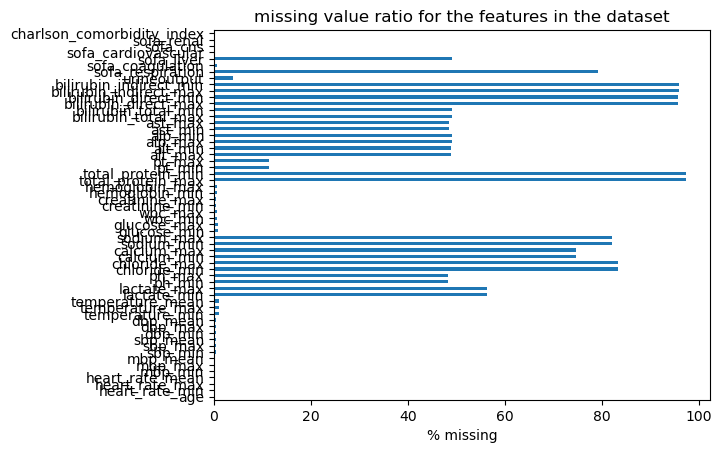

In [5]:
NaN_counts = df.isna().sum()
print(f"Columns with more than 100 missing values: {sum(NaN_counts > 100)}")
print(f"Columns with more than 500 missing values: {sum(NaN_counts > 500)}")
print(f"Columns with more than 5000 missing values: {sum(NaN_counts > 5000)}")
print(f"Columns with more than 15000 missing values: {sum(NaN_counts > 15000)}")
print(f"Columns with more than 20000 missing values: {sum(NaN_counts > 20000)}")
print(f"Columns with more than 30000 missing values: {sum(NaN_counts > 30000)}")
empty_percentages = df.isna().sum() / len(df) * 100
print(f"Columns with more than 50% missing rate: {sum(empty_percentages > 50)}")
print(f"Columns with more than 60% missing rate: {sum(empty_percentages > 60)}")
print(f"Columns with more than 70% missing rate: {sum(empty_percentages > 70)}")
print(f"Columns with more than 80% missing rate: {sum(empty_percentages > 80)}")
print(f"Columns with more than 90% missing rate: {sum(empty_percentages > 90)}")
#df.isnull().sum() / len(df) * 100
ax = empty_percentages[1:-1].plot.barh(title='missing value ratio for the features in the dataset')
ax.set_xlabel("% missing")

most of the columns missed more than 100 values, from 500 to 15000 missing values, the amount keeps stable at half of columns, then significantly changed to less than 15 when missing amount greater than 20000.
In a word, there are approximately 15 features' missing rate greater than 50% ,approximately 11 features' missing rate greater than 70% approximately 8 features' missing rate greater than 80%.

Since the difference in the number of features between 50% and 80% of the missing rate is small, you can try to remove the features between 50% and 70% to compare the difference, and if a few features greater than 60% are not critical, it can be removed.

### 1.2 show scatter chart

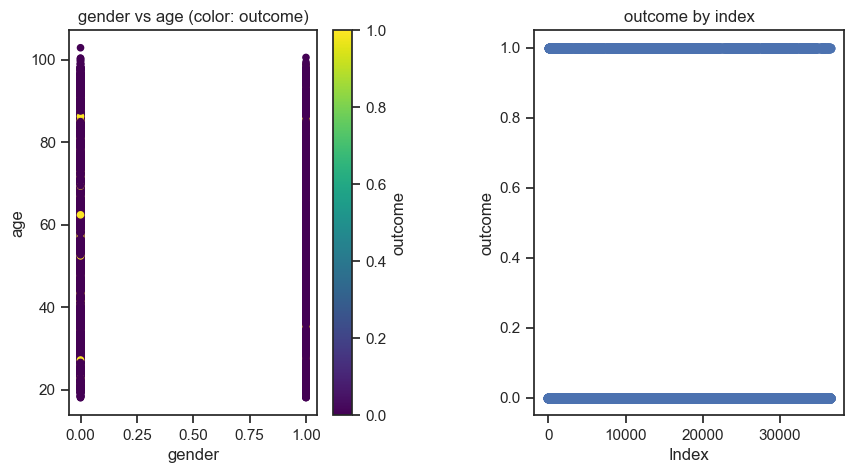

In [37]:
df['outcome'] = df['outcome'].astype(int)  # set the bool value (true or false) to 0/1

# Set x, y and z feature names
x_feature = "gender"
y_feature = "age"
z_feature = "outcome"

# Plotting point maps
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
df.plot.scatter(x=x_feature, y=y_feature, c=z_feature, cmap='viridis', ax=ax1)

# Set graph title and axis labels
ax1.set_title(f"{x_feature} vs {y_feature} (color: {z_feature})")
ax1.set_xlabel(x_feature)
ax1.set_ylabel(y_feature)

# Display Graphics
feature = 'outcome'
x = df.index.values
y = df[feature].values

# Drawing the second graph
ax2.scatter(x, y)
ax2.set_title(f'{feature} by index')
ax2.set_xlabel('Index')
ax2.set_ylabel(feature)

# Adjusting the distance between graphics
plt.subplots_adjust(wspace=0.5)
plt.show()

## 2. Data Pre-processing

### 2.1 Number convert and Set NaN Filter

In [7]:
# apart from "outcome" , "gender" also should be Convert to digital number,0 for'F',1 for 'M'
df['gender'] = df['gender'].replace(['F', 'M'], [0, 1])

# set a filter to select feature more than a set missing rate,get Flitered data.
F_df = df.loc[:, empty_percentages < 60]
F_df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,NaN,3459.0,0.0,NaN,1.0,0.0,1.0,3,0
1,1,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,NaN,2020.0,1.0,NaN,1.0,1.0,1.0,8,0
2,1,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,1.1,1.1,3050.0,1.0,0.0,1.0,1.0,0.0,4,0
3,1,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,NaN,1592.0,0.0,NaN,0.0,0.0,1.0,6,0
4,1,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,0.9,0.8,339.0,0.0,0.0,4.0,1.0,3.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,0.6,0.5,697.0,0.0,0.0,1.0,4.0,1.0,10,0
36485,0,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,NaN,2000.0,0.0,NaN,1.0,1.0,0.0,0,0
36486,0,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,NaN,3500.0,0.0,NaN,1.0,0.0,0.0,3,0
36487,1,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,NaN,1900.0,0.0,NaN,0.0,1.0,0.0,5,0


### 2.2 Data imputation

In [8]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
from sklearn.impute import SimpleImputer
#Instantiate an Imputer
imputer = SimpleImputer(strategy='median')
# Use Fit() to Calculate the magnitude of the correlation value of the X matrix
imputer.fit(F_df)
# Transform the data by replacing missing values with the mean value of the corresponding column
F_df = pd.DataFrame(imputer.transform(F_df),columns = F_df.columns)

F_df.to_csv('Assignment_1_puredata.csv', index=False)
F_df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1.0,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,0.6,0.6,3459.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0
1,1.0,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,0.6,0.6,2020.0,1.0,0.0,1.0,1.0,1.0,8.0,0.0
2,1.0,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,1.1,1.1,3050.0,1.0,0.0,1.0,1.0,0.0,4.0,0.0
3,1.0,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,0.6,0.6,1592.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
4,1.0,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,0.9,0.8,339.0,0.0,0.0,4.0,1.0,3.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0.0,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,0.6,0.5,697.0,0.0,0.0,1.0,4.0,1.0,10.0,0.0
36485,0.0,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,0.6,0.6,2000.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36486,0.0,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,0.6,0.6,3500.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
36487,1.0,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,0.6,0.6,1900.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0


 ### 2.3 multicollinear features 

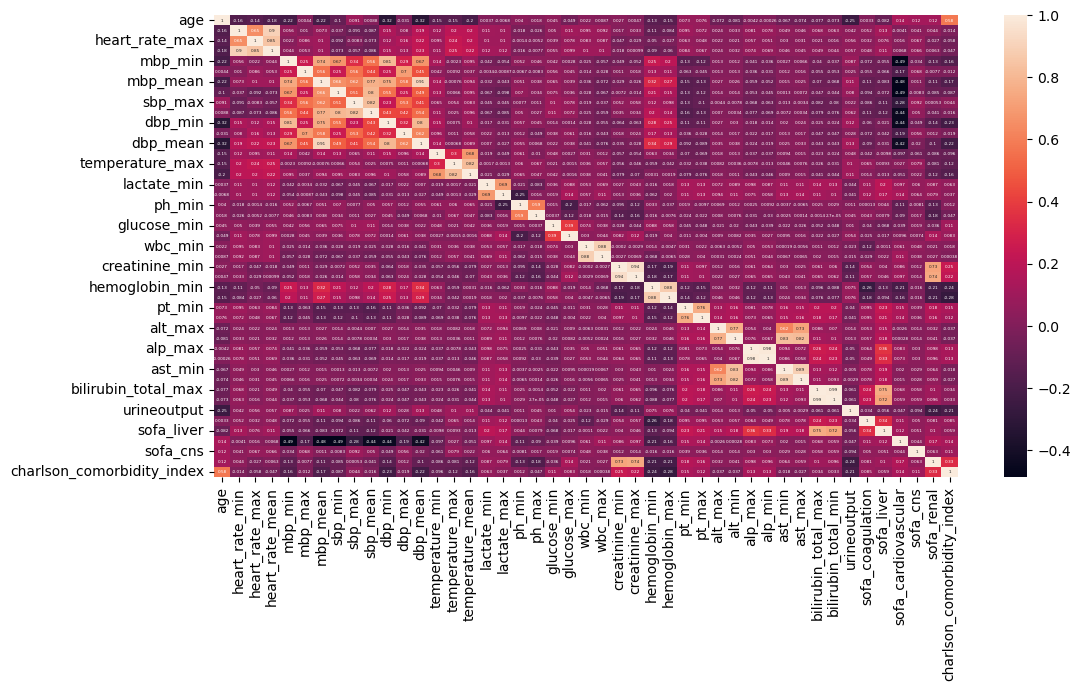

In [9]:
P_df = pd.read_csv('./Assignment_1_puredata.csv')
y = P_df.iloc[:, -1].values  #Take the last column, i.e. output
# calculate pearson correlation between features
var_cor = P_df.iloc[:, 1:-1].corr()
plt.figure(figsize=[12, 6])
sns.heatmap(var_cor, annot=True, annot_kws={"fontsize":3})
plt.show()

This heat map shows data with a high degree of covariance, to handle multicollinear features ,Consider using regularization methods such as ridge regression or Lasso regression    

### 2.4Visualization

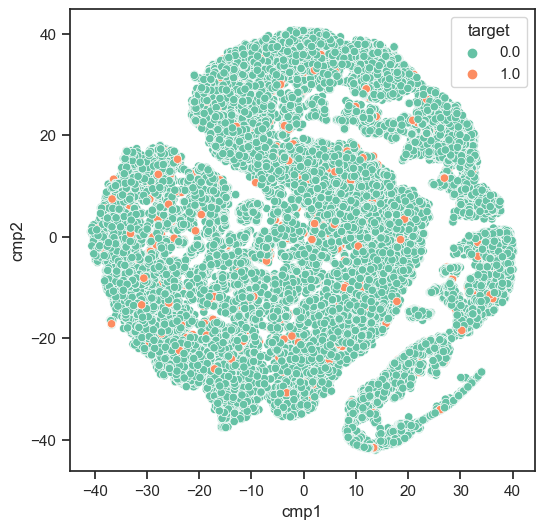

In [10]:
from sklearn import preprocessing
#X_norm = preprocessing.scale(P_df)
from sklearn.decomposition import PCA
#pca = PCA(n_components='mle')
#X_PCA = pca.fit_transform(X_norm)
# visulization
from MulticoreTSNE import MulticoreTSNE as TSNE
import seaborn as sns; sns.set()
tsne = TSNE(n_jobs=4)
X_tsne = tsne.fit_transform(P_df)
data_frame_rd = pd.DataFrame(data=X_tsne,columns=['cmp1','cmp2'])
data_frame_rd['target'] = y
fig = plt.figure(figsize=(6,6))
sns.set_context("paper")
sns.set(font_scale=1)
sns.set_style("ticks")
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="cmp1", y="cmp2", data=data_frame_rd,hue="target",
                     hue_norm=(0, 1),
                     palette="Set2",legend='brief')

From the figure, we can see that the output of the data set has a large imbalance problem.Flase(0)Output Significantly more than True(1)output.Consider using OverSampling

### 2.5 Dataset split

In [11]:
from sklearn.model_selection import train_test_split
# input and output
x = P_df.iloc[:,:-1]
y = P_df.iloc[:,-1]
# Split dataset into training and testing set after feature selection
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29191, 46)
(29191,)
(7298, 46)
(7298,)


### 2.6 Standardization/Feature Scaling

Standardization is eliminated in this round of experiments because the performance of the normalized model was worse after comparing the model performance

In [ ]:
from sklearn.preprocessing import StandardScaler

# # X_train is the training set features, X_test is the test set features
# # First instantiate a StandardScaler object
# scaler = StandardScaler()
# 
# # Normalization of training set features
# X_train_scaled = scaler.fit_transform(X_train)
# 
# # Normalization of test set features
# X_test_scaled = scaler.transform(X_test)

In [13]:
# X_train_scaleddf = pd.DataFrame(X_train_scaled,columns = X_train.columns)
# X_train_scaleddf

In [14]:
# X_test_scaleddf = pd.DataFrame(X_test_scaled,columns = X_test.columns)
# X_test_scaleddf

### 2.7 Oversampling/SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

# X and y are the features and labels of the training set, respectively
smote = SMOTE(random_state=42) # Initialize SMOTE object
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) # Sampling was performed

In [16]:
print(X_resampled.shape)
print(y_resampled.shape)

(56262, 46)
(56262,)


## 3.Feature Selection

### 3.1 GeneticSelection algrithom

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#rfc = RandomForestClassifier(n_estimators=100)
lrc_l2 = LogisticRegression(penalty='l2', solver='saga')
selector = GeneticSelectionCV(estimator= lrc_l2,
                              cv=5,
                              verbose=1,
                              scoring="f1",
                              max_features=30,
                              n_population=50,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=50,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=3,
                              caching=True,
                              n_jobs=-1)
# Select the best features using the genetic algorithm
selector = selector.fit(X_resampled,y_resampled)

# Select the features in the original dataset
selected_features = X_resampled.columns[selector.support_]
print("Selected features: ",selected_features)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	50    	[  0.565234  15.76       0.0058  ]	[ 0.110681  8.972313  0.004747]	[ 0.111033  1.        0.000025]	[  0.713251  30.         0.036903]
1  	29    	[  0.61354   17.72       0.005962]	[ 0.059995  7.730563  0.004799]	[ 0.359284  3.        0.000025]	[  0.713251  30.         0.03796 ]
2  	28    	[-199.366497   15.72      200.005308]	[ 1400.090502     6.690411  1399.999242]	[-10000.            3.            0.002194]	[     0.713251     32.        10000.      ]
3  	25    	[  0.668025  11.88       0.005282]   	[ 0.055768  5.31654   0.001596]         	[ 0.514091  3.        0.002779]            	[  0.715054  26.         0.01058 ]         
4  	31    	[ 0.69794   7.5       0.004311]      	[ 0.053428  3.601389  0.001677]         	[ 0.3593    3.        0.001982]            	[  0.71539   21.         0.01320

46 	35    	[  0.713994  13.88       0.003422]   	[ 0.030963  0.84      0.000367]         	[  0.555743  13.         0.002084]         	[  0.72094   17.         0.005012]         
47 	32    	[  0.707749  13.78       0.004433]   	[ 0.042448  0.922822  0.003039]         	[  0.540213  12.         0.002831]         	[  0.72094   16.         0.018165]         
48 	22    	[  0.702338  13.44       0.003667]   	[ 0.052886  0.983056  0.000722]         	[  0.483133  11.         0.001332]         	[  0.72094   18.         0.006475]         
49 	26    	[  0.705004  13.2        0.003818]   	[ 0.047734  0.69282   0.000588]         	[  0.529269  11.         0.003282]         	[  0.72094  15.        0.00682]            
50 	30    	[  0.712302  13.26       0.003801]   	[ 0.030799  0.795236  0.000514]         	[  0.568386  13.         0.00305 ]         	[  0.72094   17.         0.007074]         
Selected features:  Index(['gender', 'heart_rate_mean', 'mbp_min', 'mbp_mean', 'sbp_min',
       'sbp_mean', '

D:\Tcode9\NUS\IT5006\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
print(len(selected_features))

13


LASSOround1
Trial1:  Selected features:  Index(['sbp_min', 'dbp_mean', 'glucose_min', 'alt_max', 'alt_min', 'alp_max',
       'ast_max'],
      dtype='object')
LASSOTrial2:  Selected features:  Index(['mbp_min', 'wbc_max', 'bilirubin_total_max', 'sofa_cns', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')

round 2
LASSOTrial1: Selected features:  Index(['heart_rate_mean', 'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_max',
       'dbp_mean', 'temperature_min', 'wbc_min', 'hemoglobin_max', 'pt_min',
       'pt_max', 'ast_max', 'urineoutput', 'sofa_cns',
       'charlson_comorbidity_index'],
      dtype='object')

LASSORound3
Selected features:  Index(['heart_rate_mean', 'mbp_max', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_max', 'temperature_min', 'temperature_mean', 'lactate_min',
       'lactate_max', 'ph_max', 'glucose_min', 'glucose_max', 'wbc_min',
       'creatinine_max', 'hemoglobin_min', 'pt_min', 'pt_max', 'alt_max',
       'bilirubin_total_max', 'bilirubin_total_min', 'urineoutput',
       'sofa_coagulation', 'sofa_cns', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')

LASSOround4
Selected features:  Index(['heart_rate_mean', 'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_max',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_max',
       'glucose_min', 'wbc_min', 'hemoglobin_min', 'hemoglobin_max', 'pt_max',
       'alt_min', 'alp_max', 'alp_min', 'ast_min', 'ast_max',
       'bilirubin_total_min', 'urineoutput', 'sofa_coagulation', 'sofa_cns',
       'sofa_renal', 'charlson_comorbidity_index'],
      dtype='object')

round5 RF
Selected features:  Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'dbp_min',
       'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_max', 'ph_min', 'ph_max', 'glucose_min',
       'glucose_max', 'wbc_min', 'wbc_max', 'creatinine_min', 'hemoglobin_min',
       'hemoglobin_max', 'pt_max', 'alp_max', 'urineoutput',
       'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')

feature with 、Ridge （L2）:Selected features:  Index(['gender', 'heart_rate_mean', 'mbp_min', 'mbp_mean', 'sbp_min',
       'sbp_mean', 'dbp_max', 'lactate_max', 'ph_max', 'wbc_min', 'wbc_max',
       'pt_max', 'sofa_cns'],
      dtype='object')

### 3.2 Selected Feature

In [19]:
selected_df = X_resampled[selected_features]
selected_df

,gender,heart_rate_mean,mbp_min,mbp_mean,sbp_min,sbp_mean,dbp_max,lactate_max,ph_max,wbc_min,wbc_max,pt_max,sofa_cns
0,0.000000,67.685714,43.000000,65.441176,61.000000,113.848485,80.000000,1.200000,7.390000,12.800000,16.000000,14.200000,1.000000
1,1.000000,88.400000,58.000000,72.280000,90.000000,116.560000,89.000000,1.900000,7.410000,7.900000,10.300000,13.100000,1.000000
2,0.000000,89.291667,61.000000,76.600000,90.000000,105.000000,104.000000,1.900000,7.410000,17.200000,17.200000,11.900000,0.000000
3,0.000000,98.560000,61.000000,83.840000,90.000000,112.800000,91.000000,2.300000,7.260000,4.700000,5.000000,11.800000,0.000000
4,1.000000,67.774194,69.000000,84.827586,111.000000,130.758621,89.000000,1.900000,7.410000,4.400000,4.400000,14.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56257,0.723814,85.200683,57.371531,70.485165,104.152642,131.143346,77.476276,2.341898,7.445904,8.847628,8.875246,14.148568,0.828559
56258,0.120253,112.092697,44.882911,81.033449,25.613924,122.355057,78.727848,5.103165,7.508797,4.492405,9.092405,69.658860,3.879747
56259,1.000000,98.809781,60.679824,87.327868,85.359648,129.280910,96.428726,1.431031,7.383202,11.108881,12.726097,14.659101,1.669956
56260,0.017037,78.669143,72.914815,97.550557,103.880742,133.712811,114.591114,1.888074,7.410000,7.066444,7.066444,12.305111,3.000000


### Visualization

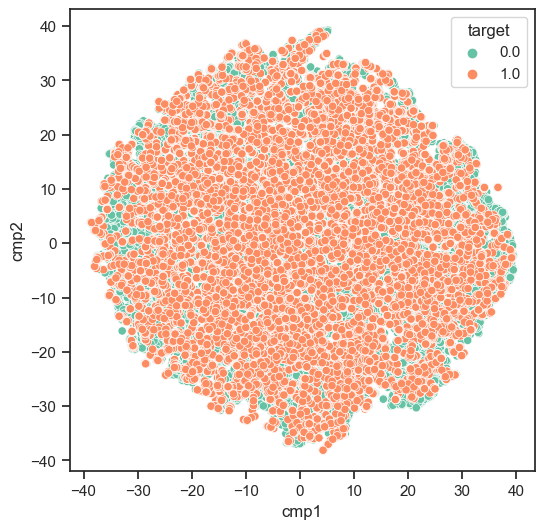

In [20]:
#X_norm = preprocessing.scale(selected_df)
#pca = PCA(n_components='mle')
#X_PCA = pca.fit_transform(X_norm)
# visulization
tsne = TSNE(n_jobs=4)
X_tsne = tsne.fit_transform(selected_df)
data_frame_rd = pd.DataFrame(data=X_tsne,columns=['cmp1','cmp2'])
data_frame_rd['target'] = y_resampled
fig = plt.figure(figsize=(6,6))
sns.set_context("paper")
sns.set(font_scale=1)
sns.set_style("ticks")
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="cmp1", y="cmp2", data=data_frame_rd,hue="target",
                     hue_norm=(0, 1),
                     palette="Set2",legend='brief')

## 4.Models

### 4.1 LogisticRegression

In [21]:
X_test_S = X_test[selected_features]
X_test_S

,gender,heart_rate_mean,mbp_min,mbp_mean,sbp_min,sbp_mean,dbp_max,lactate_max,ph_max,wbc_min,wbc_max,pt_max,sofa_cns
22866,1.0,66.200000,94.0,103.125000,149.0,161.958333,107.0,1.5,7.39,10.4,11.5,16.6,0.0
28981,0.0,90.080000,56.0,71.125000,97.0,112.583333,79.0,1.7,7.36,8.0,9.4,13.3,0.0
16232,1.0,80.620690,45.0,63.360000,82.0,99.160000,80.0,1.5,7.38,13.7,20.6,20.7,4.0
2004,1.0,122.760000,83.0,94.040000,98.0,119.600000,95.0,12.1,7.47,7.9,9.8,17.5,2.0
3380,0.0,56.192308,50.0,60.120000,76.0,101.280000,63.0,1.9,7.41,10.9,13.2,14.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16095,0.0,71.296296,56.0,76.875000,81.0,113.600000,91.0,1.9,7.41,4.1,4.8,29.7,2.0
1903,1.0,76.250000,72.0,88.000000,121.0,144.750000,86.0,1.9,7.41,8.5,14.0,22.2,0.0
23807,0.0,63.800000,51.0,73.739130,103.0,158.136364,60.0,1.9,7.41,7.4,7.4,13.9,0.0
13802,1.0,82.166667,60.0,103.954545,128.0,148.727273,152.0,1.9,7.42,0.7,0.7,13.9,0.0


### Cross-validation and grid_search

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
params = {'C': [0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(max_iter = 10000)
grid_search = GridSearchCV(logreg, params, cv=5)
grid_search.fit(selected_df, y_resampled)
scores = cross_val_score(logreg, selected_df, y_resampled, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.72940549 0.73447081 0.73515819 0.73702453 0.73702453]
Mean cross-validation score: 0.7346167103395013


In [23]:
LR_model = LogisticRegression()
LR_model.fit(selected_df, y_resampled)

D:\Tcode9\NUS\IT5006\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### LR_Model Evaluation

**Accuracy** / **Confusion Matrix**  / **Precision** / **Recall** / **F1 Score** / **ROC Curve and AUC**

Model:LogisticRegression 
Accuracy:  0.7759660180871472
confusion_matrix:
 [[5498 1531]
 [ 104  165]]
precision: 0.0972877358490566
recall: 0.6133828996282528
F1_score: 0.16793893129770993
Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.78      0.87      7029
         1.0       0.10      0.61      0.17       269

    accuracy                           0.78      7298
   macro avg       0.54      0.70      0.52      7298
weighted avg       0.95      0.78      0.84      7298



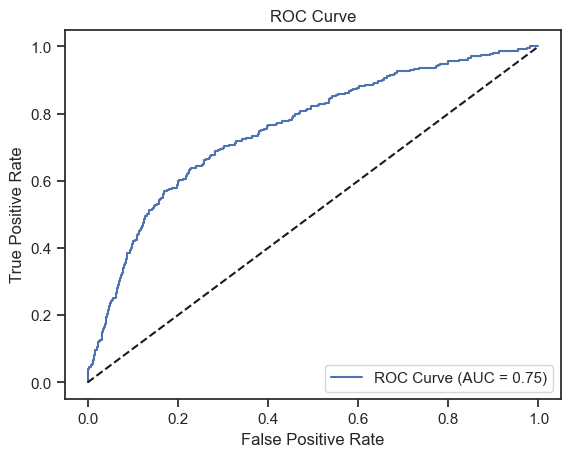

Text(0.5, 0, 'Predicted label')

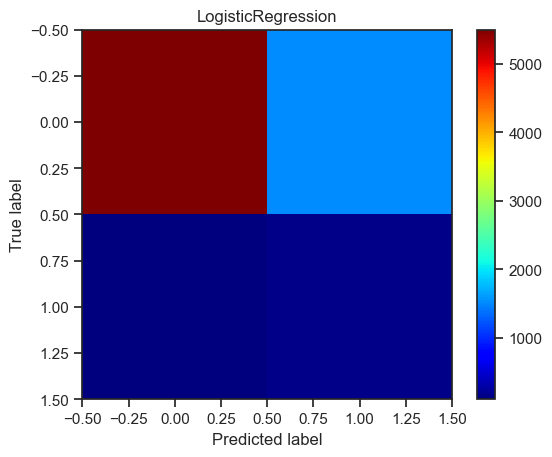

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve
#Accuracy
y_pred_lr = LR_model.predict(X_test_S)
accuracy_lr = LR_model.score(X_test_S, y_test)

# make predictions on the testing set and compute the confusion matrix
y_pred_lr = LR_model.predict(X_test_S)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# make predictions on the testing set and compute the precision score
precision_lr = precision_score(y_test, y_pred_lr)

# make predictions on the testing set and compute the recall score
recall_lr = recall_score(y_test, y_pred_lr)

# make predictions on the testing set and compute the F1 score
f1_lr = f1_score(y_test, y_pred_lr)

print("Model:LogisticRegression ")
print("Accuracy: ",accuracy_lr)
print("confusion_matrix:\n",confusion_matrix_lr)
print("precision:",precision_lr)
print("recall:",recall_lr)
print("F1_score:",f1_lr)
print('Classification report:\n', classification_report(y_test, y_pred_lr))
# compute the predicted probabilities and the AUC
y_pred_prob = LR_model.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
#confusion matrix jet
plt.imshow(confusion_matrix_lr,cmap=plt.cm.jet)
plt.colorbar()
plt.title("LogisticRegression")
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 4.2 Decision Tree

In [25]:
DT_model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
DT_model.fit(selected_df, y_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Model:Decision Tree 
Accuracy:  0.9379281995067141
confusion_matrix:
 [[6805  224]
 [ 229   40]]
precision: 0.15151515151515152
recall: 0.14869888475836432
F1_score: 0.150093808630394
Classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      7029
         1.0       0.15      0.15      0.15       269

    accuracy                           0.94      7298
   macro avg       0.56      0.56      0.56      7298
weighted avg       0.94      0.94      0.94      7298



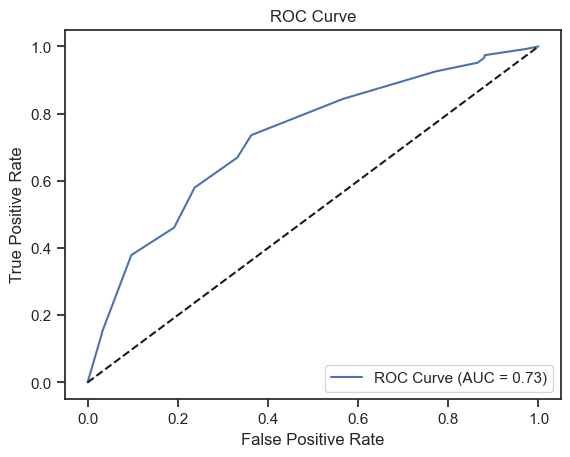

Text(0.5, 0, 'Predicted label')

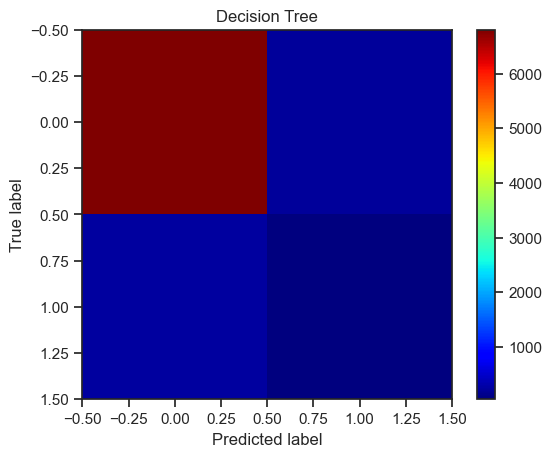

In [42]:
y_pred_DT = DT_model.predict(X_test_S)
accuracy_DT = DT_model.score(X_test_S, y_test)

y_pred_DT = DT_model.predict(X_test_S)
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)

precision_DT = precision_score(y_test, y_pred_DT)

recall_DT = recall_score(y_test, y_pred_DT)

f1_DT = f1_score(y_test, y_pred_DT)

print("Model:Decision Tree ")
print("Accuracy: ",accuracy_DT)
print("confusion_matrix:\n",confusion_matrix_DT)
print("precision:",precision_DT)
print("recall:",recall_DT)
print("F1_score:",f1_DT)
print('Classification report:\n', classification_report(y_test, y_pred_DT))
# compute the predicted probabilities and the AUC
y_pred_prob = DT_model.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
#confusion matrix jet
plt.imshow(confusion_matrix_DT,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Decision Tree")
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 4.3 RandomForest

In [27]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(selected_df, y_resampled)

RandomForestClassifier()

Model:RandomForest 
Accuracy:  0.949438202247191
confusion_matrix:
 [[6913  116]
 [ 253   16]]
precision: 0.12121212121212122
recall: 0.05947955390334572
F1_score: 0.0798004987531172
Classification report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      7029
         1.0       0.12      0.06      0.08       269

    accuracy                           0.95      7298
   macro avg       0.54      0.52      0.53      7298
weighted avg       0.93      0.95      0.94      7298



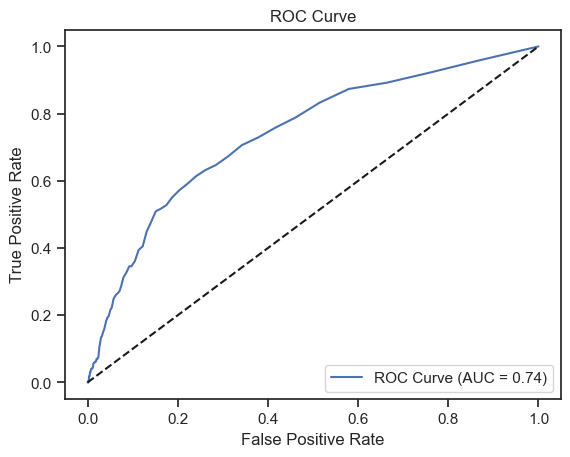

Text(0.5, 0, 'Predicted label')

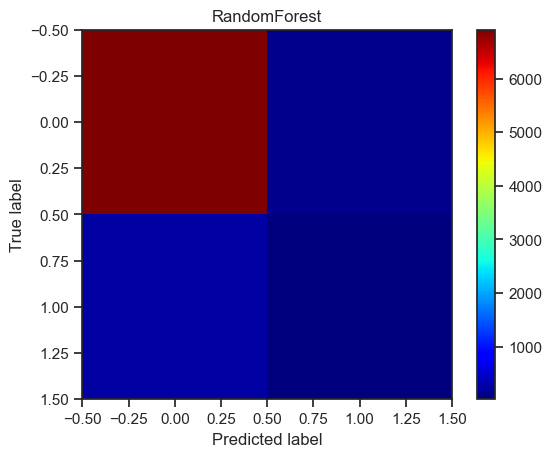

In [43]:
y_pred_DT = RF_model.predict(X_test_S)
accuracy_DT = RF_model.score(X_test_S, y_test)

y_pred_DT = RF_model.predict(X_test_S)
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)

precision_DT = precision_score(y_test, y_pred_DT)

recall_DT = recall_score(y_test, y_pred_DT)

f1_DT = f1_score(y_test, y_pred_DT)

print("Model:RandomForest ")
print("Accuracy: ",accuracy_DT)
print("confusion_matrix:\n",confusion_matrix_DT)
print("precision:",precision_DT)
print("recall:",recall_DT)
print("F1_score:",f1_DT)
print('Classification report:\n', classification_report(y_test, y_pred_DT))
# compute the predicted probabilities and the AUC
y_pred_prob = RF_model.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
#confusion matrix jet
plt.imshow(confusion_matrix_DT,cmap=plt.cm.jet)
plt.colorbar()
plt.title("RandomForest")
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 4.4AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(selected_df, y_resampled)
#对测试集进行预测并计算准确率、精确率、召回率和F1分数等指标。

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = adaboost.predict(X_test_S)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#可以根据需要进行模型参数调整和优化，例如调整AdaBoost分类器的 n_estimators 参数、 learning_rate 参数等。

adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
adaboost.fit(selected_df, y_resampled)
y_pred = adaboost.predict(X_test_S)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Model:AdaBoost 
Accuracy:  0.8961359276514114
confusion_matrix:
 [[6464  565]
 [ 193   76]]
precision: 0.11856474258970359
recall: 0.2825278810408922
F1_score: 0.16703296703296702
Classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      7029
         1.0       0.12      0.28      0.17       269

    accuracy                           0.90      7298
   macro avg       0.54      0.60      0.56      7298
weighted avg       0.94      0.90      0.92      7298



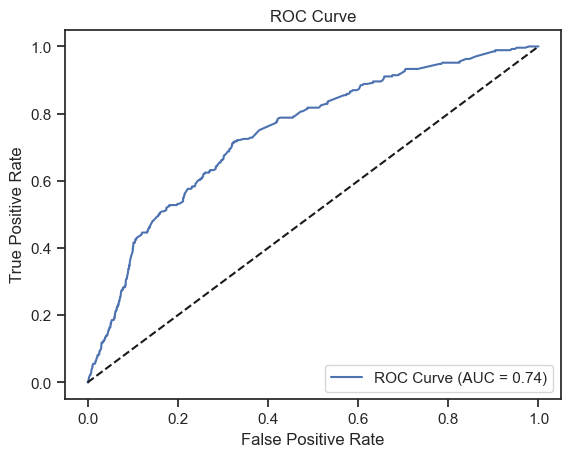

Text(0.5, 0, 'Predicted label')

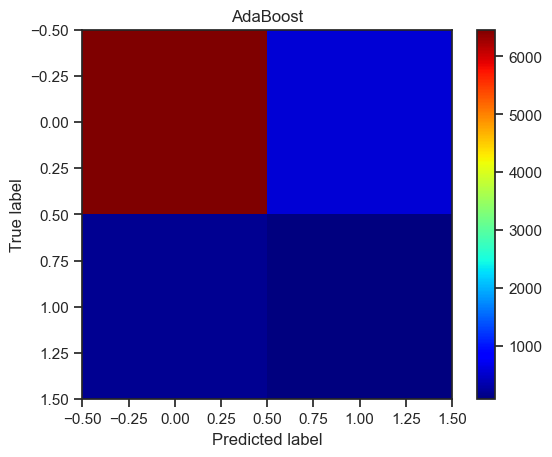

In [44]:
y_pred_AB = adaboost.predict(X_test_S)
accuracy_AB = adaboost.score(X_test_S, y_test)

y_pred_DT = adaboost.predict(X_test_S)
confusion_matrix_AB = confusion_matrix(y_test, y_pred_AB)

precision_AB = precision_score(y_test, y_pred_AB)

recall_AB = recall_score(y_test, y_pred_AB)

f1_AB = f1_score(y_test, y_pred_AB)

print("Model:AdaBoost ")
print("Accuracy: ",accuracy_AB)
print("confusion_matrix:\n",confusion_matrix_AB)
print("precision:",precision_AB)
print("recall:",recall_AB)
print("F1_score:",f1_AB)
print('Classification report:\n', classification_report(y_test, y_pred_AB))
# compute the predicted probabilities and the AUC
y_pred_prob = adaboost.predict_proba(X_test_S)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
#confusion matrix jet
plt.imshow(confusion_matrix_AB,cmap=plt.cm.jet)
plt.colorbar()
plt.title("AdaBoost")
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 4.5SVM

In [29]:
#SVM_model = SVC(kernel='linear',probability=True)
#SVM_model.fit(selected_df, y_resampled)

### SVM_Model Evaluation